In [1]:
from exiting_particles_parser import exiting_particle_times_from_multiple_files
from plotters import plot_exiting_particles_vs_t_for_multiple_ws, plot_q_vs_d
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = [
    "./simulations/exitingParticles-w_15-D_3.txt",
    "./simulations/exitingParticles-w_15-D_4.txt",
    "./simulations/exitingParticles-w_15-D_5.txt",
    "./simulations/exitingParticles-w_15-D_6.txt"
]

Ds = [
  3,
  4,
  5,
  6
]

ws = [
  15,
  15,
  15,
  15
]

t_ests = [
    30,
    30,
    30,
    30
]

save_to = './b_n_v_t.png'
colors = sns.color_palette("bright", 4)

0.295 0.295
0.583 0.583
1.118 1.118
1.702 1.702


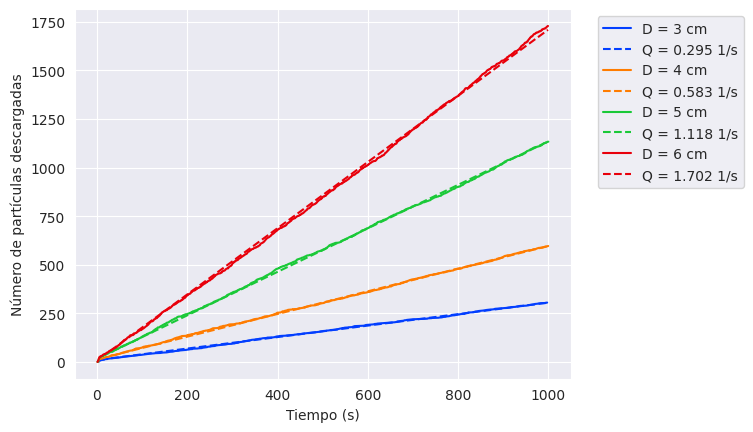

In [3]:
sns.set_style("darkgrid")
timestamps = exiting_particle_times_from_multiple_files(files)
caudales = plot_exiting_particles_vs_t_for_multiple_ws(timestamps, t_ests, Ds, colors, save_to, perform_regression=True, label_val="D", units_w="cm")

0.295 0.009973849911383136
0.583 0.014376141719426931
1.118 0.047319276511246684
1.702 0.15981980349540015


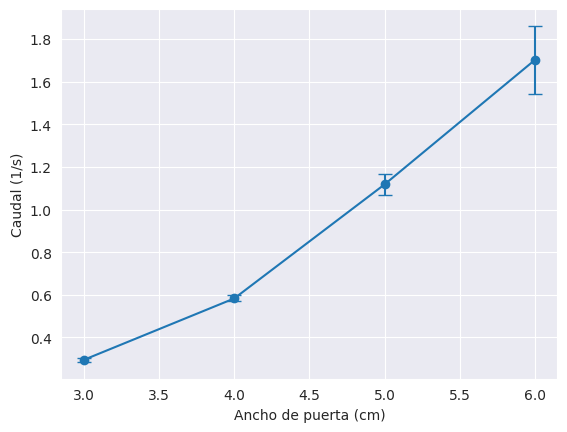

In [4]:
save_to_q_d = './Q_v_D.png'

Qs = []
Q_errs = []
for i in range(len(Ds)):
    Q, errs = caudales[Ds[i]]
    Qs.append(Q)
    if i == 0:
        Q_errs.append(errs / (1000-30))
    else:
        Q_errs.append(errs / (1000-30))
    print(Q, Q_errs[i])

plot_q_vs_d(Qs, Q_errs, Ds, ws[0], save_to_q_d, True)

In [5]:
Qs

[0.295, 0.583, 1.118, 1.702]

In [6]:
number_of_particles = 200
height = 70
width = 20
depth = 1
gravity = 5
cr = (1.15 + 0.85) / 2
exp = "2D"

In [7]:
Ds = [
    3,
    4,
    5,
    6
]

In [8]:
static_files = [
    "./simulations/static-w_15-D_3.txt",
    "./simulations/static-w_15-D_4.txt",
    "./simulations/static-w_15-D_5.txt",
    "./simulations/static-w_15-D_6.txt"
]

In [9]:
from simulation_parser import parse_static_file

In [10]:
import numpy as np

In [11]:
crs = []
for i in range(len(static_files)):
    static_file = static_files[i]
    static_info = parse_static_file(static_file)
    radii = np.array(static_info.radii)
    cr = radii.mean()
    crs.append(cr)

In [12]:
crs = np.array(crs)
cr = crs.mean()
#cr = round(crs.mean(), 2)
#cr

In [13]:
from beverloo import get_beverloo_function

In [14]:
beverloo_function = get_beverloo_function(height, width, depth, number_of_particles, gravity, exp, cr)

In [15]:
from min_sqrs import perform_regression, min_sqrs, plot_regression_data

In [16]:
X = np.array(Ds)
Y = np.array(Qs)

In [17]:
F = [beverloo_function]

In [18]:
Ks = min_sqrs(X, F, Y)

In [19]:
k = Ks.item()
k

0.4447348018340808

In [20]:
k_int = (0, k*2)

In [21]:
Ks = np.arange(k_int[0], k_int[1] + 0.001, 0.001)

In [22]:
min_f, reg_data, _ = perform_regression(X, Ks, lambda D, c : c*beverloo_function(D), Y)

In [23]:
best_k = round(reg_data.Ks[reg_data.best_k_idx], 3)
best_k

0.445

In [24]:
beverloo_adjusted = lambda D: best_k*beverloo_function(D)

In [25]:
O = beverloo_adjusted(X)
O

array([0.40241956, 0.73907236, 1.13770731, 1.58985257])

In [26]:
import matplotlib.pyplot as plt

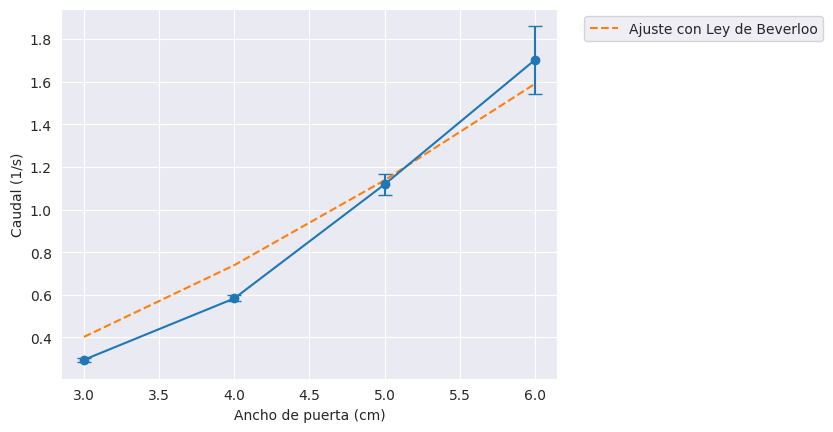

In [27]:
sns.set_style("darkgrid")
plt.errorbar(Ds, Qs, yerr=Q_errs, fmt='o', linestyle="-", capsize=5)
plt.plot(Ds, O, linestyle="--", label="Ajuste con Ley de Beverloo\nc={}".format(best_k))
plt.xlabel("Ancho de puerta (cm)")
plt.ylabel("Caudal (1/s)")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

In [28]:
for i in range(len(reg_data.Ks)):
    reg_data.Ks[i] = round(reg_data.Ks[i], 3)

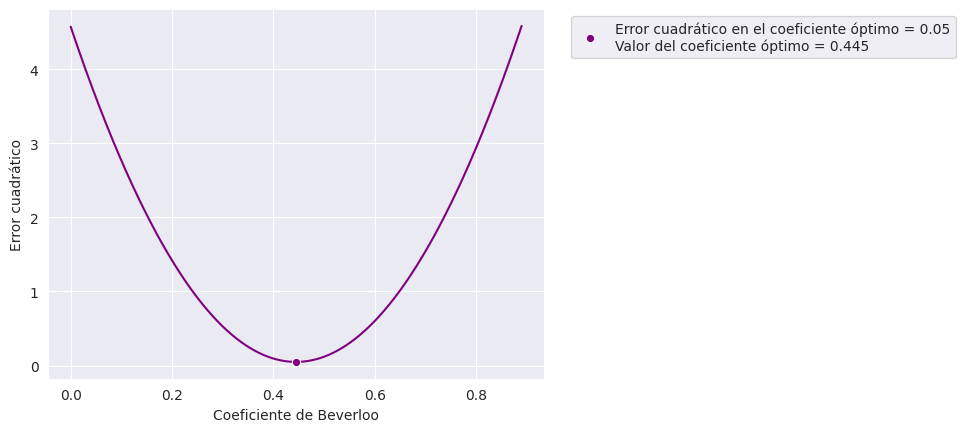

In [29]:
plot_regression_data(reg_data, "beverloo_err.png", "Coeficiente de Beverloo")